# Project: Economy Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

> Economic Growth can be best explained by examining five important sources of economic growth 

> Labour supply - The labor force is the number of people over the age of 16 who are either working or available for work but currently unemployed. It is affected by population growth, net immigration and the labor force participation rate.
 
> Physical Capital Stock - A high rate of investment increases a country's stock of physical capital. As noted earlier, a larger capital stock increases labor productivity and potential GDP. 

> Technology - Improvements in technology increase productivity and potential GDP. More rapid improvements in technology lead to greater rates of economic growth.

> Natural Resources - Raw material inputs, such as oil and land, are necessary to produce economic output. These resources may be renewable. Countries with large amounts of productive natural resources can achieve greater rates of economic growth

> In developed countries, where a high level of capital per worker is available and capital inputs experience diminishing marginal productivity, technological advances that increase total factor productivity are the main sources of sustainable economic growth

> It is also imprtant to analyze the human development index to ensure that the economic growth also improves HDI


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# <a id='wrangling'></a>
## Data Wrangling


### General Properties

> Data Set Description - 

The data set was obtained from Gapminder world. Following datasets were taken to merge features like - gdp, income, population, labor participation, investment, tax revenue, hdi, r&d investment, inflation, interest rates and natural resources rent. 

Each data set contained time series data for each feature for multiple countries. out of them data for the US was chosen from the year 2005 to 2015. Then they were mergerd to create a dataset to analyze effects and trends of each feature on the GDP as well as HDI



In [2]:
#loading the data
total_gdp = pd.read_csv('Total_gdp_inflation_adj.csv')
income = pd.read_csv('Income$.csv')
annual_inflation = pd.read_csv('inflation_annual_percent.csv')
labor_force = pd.read_csv('labor_force.csv')
interest_rate = pd.read_csv('interest_rate%.csv')
population = pd.read_csv('population_total.csv')
investment_perc_ofgdp = pd.read_csv('investments_percentofgdp.csv')
tax_revenue = pd.read_csv('tax_revenue_percent_of_gdp.csv')
natural_resources = pd.read_csv('total_natural_resources_rent%.csv')
res_inv = pd.read_csv('r&d_expenditure%.csv')
hdi = pd.read_csv('HDI.csv')
tech = pd.read_csv('high_tech_exports.csv')

In [3]:
#Preparing Income data for the US
gdp = total_gdp.transpose()

In [4]:
new_header =gdp.iloc[0]
gdp =  gdp[1:]
gdp.columns = new_header

In [5]:
gdp = gdp.loc[:,['United States']]
gdp = gdp.transpose()
gdp = gdp.loc[:,'2005':'2015']

In [6]:
gdp = gdp.transpose()

In [7]:
gdp.reset_index(level=0,inplace=True)
gdp.rename(columns={'index':'year'}, inplace = True)
gdp.columns.name = None
#fixing the data types
# income['year'] = pd.to_datetime(income['year'])
gdp['United States'] = gdp['United States'].replace('\D', '', regex = True).astype(float)
gdp['United States'] = gdp['United States']/10
#changing column names
gdp.rename(columns = {'United States':'gdp_trillions'},inplace = True)


In [8]:
gdp.drop(columns = 'year', inplace=True)

In [9]:
#Gathering Income data for the US
income = income.transpose()

In [10]:
new_header =income.iloc[0]
income =  income[1:]
income.columns = new_header

In [11]:
income = income.loc[:,['United States']]
income = income.transpose()
income = income.loc[:,'2005':'2015']

In [12]:
income = income.transpose()

In [13]:
income.reset_index(level=0,inplace=True)
income.rename(columns={'index':'year'}, inplace = True)
income.columns.name = None
#fixing the data types
# income['year'] = pd.to_datetime(income['year'])
income['United States'] = income['United States'].replace('\D', '', regex = True).astype(int)
#making the thousands since we removed k 
income['United States'] = income['United States']*1000
#changing column names
income.rename(columns = {'United States':'income'},inplace = True)

In [14]:
#############################################################

In [15]:
#Preparing Inflation data
inflation = annual_inflation.transpose()

In [16]:
new_header =inflation.iloc[0]
inflation =  inflation[1:]
inflation.columns = new_header
inflation = inflation.loc[:,['United States']]
inflation = inflation.transpose()
inflation = inflation.loc[:,'2005':'2015']

In [17]:
inflation = inflation.transpose()

In [18]:
inflation.reset_index(level=0,inplace=True)
inflation.rename(columns={'index':'year'}, inplace = True)
inflation.columns.name = None

In [19]:
inflation['United States'] = inflation['United States'].astype(float)
inflation.rename(columns = {'United States':'inflation_p'},inplace = True)

In [20]:
inflation.drop(columns = 'year', inplace=True)

In [21]:
###########################################################

In [22]:
#Preparing interest_rate data
interest_rate = interest_rate.transpose()

In [23]:
new_header =interest_rate.iloc[0]
interest_rate =  interest_rate[1:]
interest_rate.columns = new_header
interest_rate = interest_rate.loc[:,['United States']]
interest_rate = interest_rate.transpose()
interest_rate = interest_rate.loc[:,'2000':'2015']

In [24]:
interest_rate = interest_rate.transpose()

In [25]:
interest_rate.reset_index(level=0,inplace=True)
interest_rate.rename(columns={'index':'year'}, inplace = True)
#removing column name
interest_rate.columns.name = None
#changing data type
interest_rate['United States'] = interest_rate['United States'].astype(float)
interest_rate.rename(columns = {'United States':'interest_rate_p'},inplace = True)
interest_rate.drop(columns = 'year', inplace=True)

In [26]:
######################################################################

In [27]:
#Preparing population data for the US
population = population.transpose()

In [28]:
new_header =population.iloc[0]
population=  population[1:]
population.columns = new_header
population = population.loc[:,['United States']]

In [29]:
population = population.transpose()

In [30]:
population = population.loc[:,'2005':'2015']

In [31]:
population = population.transpose()

In [32]:
population.reset_index(level=0,inplace=True)
population.rename(columns={'index':'year'}, inplace = True)
population.columns.name = None

In [33]:
population.reset_index(level=0,inplace=True)
population.rename(columns={'index':'year'}, inplace = True)
#removing column name
population.columns.name = None
#changing data type
population['United States'] = population['United States'].replace('\D', '', regex = True).astype(int)
population.rename(columns = {'United States':'population_m'},inplace = True)
population.drop(columns = 'year', inplace=True)

In [34]:
#########################################################################

In [35]:
#Preparing investement data for the US
investment_perc_ofgdp = investment_perc_ofgdp.transpose()

In [36]:
new_header =investment_perc_ofgdp.iloc[0]
investment_perc_ofgdp =  investment_perc_ofgdp[1:]
investment_perc_ofgdp.columns = new_header

In [37]:
investment_perc_ofgdp = investment_perc_ofgdp.loc[:,['United States']]
investment_perc_ofgdp = investment_perc_ofgdp.transpose()
investment_perc_ofgdp = investment_perc_ofgdp.loc[:,'2005':'2015']

In [38]:
investment_perc_ofgdp = investment_perc_ofgdp.transpose()

In [39]:
investment_perc_ofgdp.reset_index(level=0,inplace=True)
investment_perc_ofgdp.rename(columns={'index':'year'}, inplace = True)
investment_perc_ofgdp.columns.name = None
investment_perc_ofgdp['United States'] = investment_perc_ofgdp['United States'].astype(float)
investment_perc_ofgdp.rename(columns = {'United States':'inv_p'},inplace = True)
investment_perc_ofgdp.drop(columns = 'year', inplace=True)

In [40]:
###########################################################################

In [41]:
#Preparing tax revenue data for the US
tax_revenue = tax_revenue.transpose()

In [42]:
new_header =tax_revenue.iloc[0]
tax_revenue =  tax_revenue[1:]
tax_revenue.columns = new_header

In [43]:
tax_revenue = tax_revenue.loc[:,['United States']]
tax_revenue = tax_revenue.transpose()
tax_revenue = tax_revenue.loc[:,'2005':'2015']

In [44]:
tax_revenue = tax_revenue.transpose()

In [45]:
tax_revenue.reset_index(level=0,inplace=True)
tax_revenue.rename(columns={'index':'year'}, inplace = True)
tax_revenue.columns.name = None
tax_revenue['United States'] = tax_revenue['United States'].astype(float)
tax_revenue.rename(columns = {'United States':'tax_rev_p'},inplace = True)
tax_revenue.drop(columns = 'year', inplace=True)

In [46]:
#############################################################################

In [47]:
#Preparing natural resources rent data for the US
natural_resources = natural_resources .transpose()

In [48]:
new_header = natural_resources.iloc[0]
natural_resources  =  natural_resources[1:]
natural_resources.columns = new_header

In [49]:
natural_resources = natural_resources.loc[:,['United States']]
natural_resources = natural_resources.transpose()
natural_resources = natural_resources.loc[:,'2005':'2015']

In [50]:
natural_resources = natural_resources.transpose()

In [51]:
natural_resources.reset_index(level=0,inplace=True)
natural_resources.rename(columns={'index':'year'}, inplace = True)
natural_resources.columns.name = None
natural_resources['United States'] = natural_resources['United States'].astype(float)
natural_resources.rename(columns = {'United States':'natural_resources_rent_p'},inplace = True)
natural_resources.drop(columns = 'year', inplace=True)

In [52]:
######################################################################

In [53]:
#Preparing research investment data for the US
res_inv = res_inv.transpose()

In [54]:
new_header = res_inv.iloc[0]
res_inv  =  res_inv[1:]
res_inv.columns = new_header

In [55]:
res_inv = res_inv.loc[:,['United States']]
res_inv = res_inv.transpose()
res_inv = res_inv.loc[:,'2005':'2015']

In [56]:
res_inv= res_inv.transpose()

In [57]:
res_inv.reset_index(level=0,inplace=True)
res_inv.rename(columns={'index':'year'}, inplace = True)
res_inv.columns.name = None
res_inv['United States'] = res_inv['United States'].astype(float)
res_inv.rename(columns = {'United States':'research_inv_p'},inplace = True)
res_inv.drop(columns = 'year', inplace=True)

In [58]:
######################################################################

In [59]:
#Preparing hdi data for the US
hdi = hdi.transpose()

In [60]:
new_header = hdi.iloc[0]
hdi =  hdi[1:]
hdi.columns = new_header

In [61]:
hdi = hdi.loc[:,['United States']]
hdi = hdi.transpose()
hdi = hdi.loc[:,'2005':'2015']

In [62]:
hdi= hdi.transpose()

In [63]:
hdi.reset_index(level=0,inplace=True)
hdi.rename(columns={'index':'year'}, inplace = True)
hdi.columns.name = None
hdi['United States'] = hdi['United States'].astype(float)
hdi.rename(columns = {'United States':'HDI'},inplace = True)
hdi.drop(columns = 'year', inplace=True)

In [64]:
######################################################################

In [65]:
#Preparing Tech data for the US
tech = tech.transpose()

In [66]:
new_header = tech.iloc[0]
tech  =  tech[1:]
tech.columns = new_header

In [67]:
tech = tech.loc[:,['United States']]
tech = tech.transpose()
tech = tech.loc[:,'2005':'2015']

In [68]:
tech = tech.transpose()

In [69]:
tech.reset_index(level=0,inplace=True)
tech.rename(columns={'index':'year'}, inplace = True)
tech.columns.name = None
tech['United States'] = tech['United States'].replace('\D', '', regex = True).astype(int)
tech.rename(columns = {'United States':'tech_exports_billions'},inplace = True)
tech.drop(columns = 'year', inplace=True)

In [70]:
######################################################################

In [71]:
#Preparing labor participation dat for the US
labor = labor_force.transpose()

In [72]:
new_header = labor.iloc[0]
labor = labor[1:]
labor.columns = new_header

In [73]:
labor = labor.loc[:,['United States']]
labor = labor.transpose()
labor = labor.loc[:,'2005':'2015']

In [74]:
labor = labor.transpose()

In [75]:
labor.reset_index(level=0,inplace=True)
labor.rename(columns={'index':'year'}, inplace = True)
labor.columns.name = None
labor['United States'] = labor['United States'].astype(float)
labor.rename(columns = {'United States':'labor_participation'},inplace = True)
labor.drop(columns = 'year', inplace=True)

In [76]:
usa = pd.concat([income,gdp,inflation,interest_rate,population,labor,investment_perc_ofgdp,tax_revenue,natural_resources,res_inv,hdi,tech], axis =1)

In [77]:
usa

,year,income,gdp_trillions,inflation_p,interest_rate_p,population_m,labor_participation,inv_p,tax_rev_p,natural_resources_rent_p,research_inv_p,HDI,tech_exports_billions
0,2005,504000,15.2,3.030,1.0,298,83.0,23.5,11.30,1.090,2.56,0.899,244.0
1,2006,509000,15.5,2.690,1.0,301,83.1,22.6,11.30,1.040,2.63,0.902,247.0
2,2007,504000,15.4,1.950,2.0,303,83.2,21.1,10.30,1.910,2.77,0.907,154.0
3,2008,486000,14.9,0.762,3.0,306,82.7,17.8,7.92,0.771,2.81,0.908,169.0
4,2009,495000,15.3,1.170,5.0,309,82.3,18.7,8.60,0.917,2.74,0.911,169.0
5,2010,499000,15.6,2.090,6.0,312,81.7,19.1,9.57,1.230,2.77,0.914,172.0
6,2011,506000,16.1,1.920,NaN,314,81.6,20.0,9.80,0.826,2.68,0.916,172.0
7,2012,512000,16.4,1.750,NaN,316,81.2,20.4,10.50,0.785,2.71,0.914,179.0
8,2013,521000,NaN,1.890,NaN,319,81.1,20.8,11.00,0.665,2.72,0.915,178.0
9,2014,532000,NaN,1.070,NaN,321,81.0,21.1,11.20,0.274,2.72,0.917,177.0


In [78]:
usa = usa.fillna(usa.mean())

In [79]:
second_column = usa.pop('gdp_trillions')
usa.insert(1,'gdp_trillions', second_column)

In [80]:
usa

,year,gdp_trillions,income,inflation_p,interest_rate_p,population_m,labor_participation,inv_p,tax_rev_p,natural_resources_rent_p,research_inv_p,HDI,tech_exports_billions
0,2005,15.20,504000,3.030,1.0,298,83.0,23.5,11.30,1.090,2.56,0.899,244.0
1,2006,15.50,509000,2.690,1.0,301,83.1,22.6,11.30,1.040,2.63,0.902,247.0
2,2007,15.40,504000,1.950,2.0,303,83.2,21.1,10.30,1.910,2.77,0.907,154.0
3,2008,14.90,486000,0.762,3.0,306,82.7,17.8,7.92,0.771,2.81,0.908,169.0
4,2009,15.30,495000,1.170,5.0,309,82.3,18.7,8.60,0.917,2.74,0.911,169.0
5,2010,15.60,499000,2.090,6.0,312,81.7,19.1,9.57,1.230,2.77,0.914,172.0
6,2011,16.10,506000,1.920,3.0,314,81.6,20.0,9.80,0.826,2.68,0.916,172.0
7,2012,16.40,512000,1.750,3.0,316,81.2,20.4,10.50,0.785,2.71,0.914,179.0
8,2013,15.55,521000,1.890,3.0,319,81.1,20.8,11.00,0.665,2.72,0.915,178.0
9,2014,15.55,532000,1.070,3.0,321,81.0,21.1,11.20,0.274,2.72,0.917,177.0


In [81]:
usa_gdp = pd.DataFrame(usa['year'])
usa_gdp['gdp'] = usa['gdp_trillions']*1000000000000
usa_gdp['income'] = usa['income']
usa_gdp['population'] = usa['population_m']*1000000
usa_gdp['labor_force']= (usa['labor_participation']*usa_gdp['population'])/100
usa_gdp['investment'] = (usa['inv_p']*usa_gdp['gdp'])/100
usa_gdp['tax_revenue'] = (usa['tax_rev_p']*usa_gdp['gdp'])/100
usa_gdp['natural_resources'] = (usa['natural_resources_rent_p']*usa_gdp['gdp'])/100
usa_gdp['research_inv'] =(usa['research_inv_p']*usa_gdp['gdp'])/100

usa_gdp_yoy = pd.DataFrame(usa_gdp['year'])
usa_gdp_yoy['gdp'] = (usa_gdp['gdp'].pct_change())*100
usa_gdp_yoy['income'] = (usa_gdp['income'].pct_change())*100
usa_gdp_yoy['population'] = (usa_gdp['population'].pct_change())*100
usa_gdp_yoy['labor_force'] = (usa_gdp['labor_force'].pct_change())*100
usa_gdp_yoy['investment'] = (usa_gdp['investment'].pct_change())*100
usa_gdp_yoy['tax_revenue'] = (usa_gdp['tax_revenue'].pct_change())*100
usa_gdp_yoy['natural_resources'] = (usa_gdp['natural_resources'].pct_change())*100
usa_gdp_yoy['research_inv']  = (usa_gdp['research_inv'].pct_change())*100
usa_gdp_yoy['inflation'] = (usa['inflation_p'].pct_change())*100

In [82]:
usa_gdp

,year,gdp,income,population,labor_force,investment,tax_revenue,natural_resources,research_inv
0,2005,1.520000e+13,504000,298000000,247340000.0,3.572000e+12,1.717600e+12,1.656800e+11,3.891200e+11
1,2006,1.550000e+13,509000,301000000,250131000.0,3.503000e+12,1.751500e+12,1.612000e+11,4.076500e+11
2,2007,1.540000e+13,504000,303000000,252096000.0,3.249400e+12,1.586200e+12,2.941400e+11,4.265800e+11
3,2008,1.490000e+13,486000,306000000,253062000.0,2.652200e+12,1.180080e+12,1.148790e+11,4.186900e+11
4,2009,1.530000e+13,495000,309000000,254307000.0,2.861100e+12,1.315800e+12,1.403010e+11,4.192200e+11
5,2010,1.560000e+13,499000,312000000,254904000.0,2.979600e+12,1.492920e+12,1.918800e+11,4.321200e+11
6,2011,1.610000e+13,506000,314000000,256224000.0,3.220000e+12,1.577800e+12,1.329860e+11,4.314800e+11
7,2012,1.640000e+13,512000,316000000,256592000.0,3.345600e+12,1.722000e+12,1.287400e+11,4.444400e+11
8,2013,1.555000e+13,521000,319000000,258709000.0,3.234400e+12,1.710500e+12,1.034075e+11,4.229600e+11
9,2014,1.555000e+13,532000,321000000,260010000.0,3.281050e+12,1.741600e+12,4.260700e+10,4.229600e+11


In [83]:
usa_gdp_yoy

,year,gdp,income,population,labor_force,investment,tax_revenue,natural_resources,research_inv,inflation
0,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006,1.973684,0.992063,1.006711,1.128406,-1.931691,1.973684,-2.704008,4.762027,-11.221122
2,2007,-0.645161,-0.982318,0.664452,0.785588,-7.239509,-9.437625,82.468983,4.643689,-27.509294
3,2008,-3.246753,-3.571429,0.990099,0.383187,-18.378778,-25.603329,-60.944108,-1.849594,-60.923077
4,2009,2.684564,1.851852,0.980392,0.491974,7.876480,11.500915,22.129371,0.126585,53.543307
5,2010,1.960784,0.808081,0.970874,0.234756,4.141764,13.461012,36.763102,3.077143,78.632479
6,2011,3.205128,1.402806,0.641026,0.517842,8.068197,5.685502,-30.693142,-0.148107,-8.133971
7,2012,1.863354,1.185771,0.636943,0.143624,3.900621,9.139308,-3.192817,3.003615,-8.854167
8,2013,-5.182927,1.757812,0.949367,0.825045,-3.323769,-0.667828,-19.677256,-4.833048,8.000000
9,2014,0.000000,2.111324,0.626959,0.502882,1.442308,1.818182,-58.796992,0.000000,-43.386243


# <a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 -
### For the highest HDI what were the features corresponding to it?

In [84]:
usa.describe()

,gdp_trillions,income,inflation_p,interest_rate_p,population_m,labor_participation,inv_p,tax_rev_p,natural_resources_rent_p,research_inv_p,HDI,tech_exports_billions
count,11.000000,11.000000,11.000000,11.00000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,15.550000,509454.545455,1.764727,3.00000,311.090909,82.036364,20.500000,10.217273,0.895182,2.715455,0.911091,186.100000
std,0.407431,15141.754432,0.702443,1.48324,8.395886,0.846490,1.642559,1.138509,0.445185,0.070903,0.006395,30.451437
min,14.900000,486000.000000,0.762000,1.00000,298.000000,81.000000,17.800000,7.920000,0.274000,2.560000,0.899000,154.000000
25%,15.350000,501500.000000,1.130000,2.50000,304.500000,81.350000,19.550000,9.685000,0.718000,2.695000,0.907500,170.500000
50%,15.550000,506000.000000,1.890000,3.00000,312.000000,81.700000,20.400000,10.500000,0.826000,2.720000,0.914000,177.000000
75%,15.575000,516500.000000,2.020000,3.00000,317.500000,82.850000,21.100000,11.100000,1.065000,2.765000,0.915500,182.550000
max,16.400000,536000.000000,3.030000,6.00000,323.000000,83.200000,23.500000,11.300000,1.910000,2.810000,0.919000,247.000000


In [85]:
usa['HDI'].describe()

count    11.000000
mean      0.911091
std       0.006395
min       0.899000
25%       0.907500
50%       0.914000
75%       0.915500
max       0.919000
Name: HDI, dtype: float64

In [86]:
usa.query('HDI == "0.919"')

,year,gdp_trillions,income,inflation_p,interest_rate_p,population_m,labor_participation,inv_p,tax_rev_p,natural_resources_rent_p,research_inv_p,HDI,tech_exports_billions
10,2015,15.55,536000,1.09,3.0,323,81.5,20.4,10.9,0.339,2.76,0.919,186.1


In [87]:
usa['income'].describe()

count        11.000000
mean     509454.545455
std       15141.754432
min      486000.000000
25%      501500.000000
50%      506000.000000
75%      516500.000000
max      536000.000000
Name: income, dtype: float64

# Research Question 2 -
### What are the economic trends and which feature contributes the most for potential gdp growth?

In [88]:
usa.describe()

,gdp_trillions,income,inflation_p,interest_rate_p,population_m,labor_participation,inv_p,tax_rev_p,natural_resources_rent_p,research_inv_p,HDI,tech_exports_billions
count,11.000000,11.000000,11.000000,11.00000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,15.550000,509454.545455,1.764727,3.00000,311.090909,82.036364,20.500000,10.217273,0.895182,2.715455,0.911091,186.100000
std,0.407431,15141.754432,0.702443,1.48324,8.395886,0.846490,1.642559,1.138509,0.445185,0.070903,0.006395,30.451437
min,14.900000,486000.000000,0.762000,1.00000,298.000000,81.000000,17.800000,7.920000,0.274000,2.560000,0.899000,154.000000
25%,15.350000,501500.000000,1.130000,2.50000,304.500000,81.350000,19.550000,9.685000,0.718000,2.695000,0.907500,170.500000
50%,15.550000,506000.000000,1.890000,3.00000,312.000000,81.700000,20.400000,10.500000,0.826000,2.720000,0.914000,177.000000
75%,15.575000,516500.000000,2.020000,3.00000,317.500000,82.850000,21.100000,11.100000,1.065000,2.765000,0.915500,182.550000
max,16.400000,536000.000000,3.030000,6.00000,323.000000,83.200000,23.500000,11.300000,1.910000,2.810000,0.919000,247.000000


In [89]:
usa_gdp_yoy.describe()

,gdp,income,population,labor_force,investment,tax_revenue,natural_resources,research_inv,inflation
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.261267,0.630784,0.808988,0.625749,-0.876191,0.519125,-1.092424,1.025290,-1.798293
std,2.704517,1.709273,0.180615,0.363499,7.957399,11.479683,44.361190,3.003683,41.774963
min,-5.182927,-3.571429,0.623053,0.143624,-18.378778,-25.603329,-60.944108,-4.833048,-60.923077
25%,-0.483871,0.765930,0.637963,0.410384,-3.322210,-2.175886,-27.939170,-0.111080,-23.437251
50%,0.931677,1.088917,0.806909,0.510362,-0.244692,1.895933,-2.948413,0.798587,-8.494069
75%,1.970459,1.669061,0.978013,0.815181,4.081478,8.275856,23.324314,3.058761,6.467290
max,3.205128,2.111324,1.006711,1.244183,8.068197,13.461012,82.468983,4.762027,78.632479


In [90]:
# Analyzing gdp yoy 

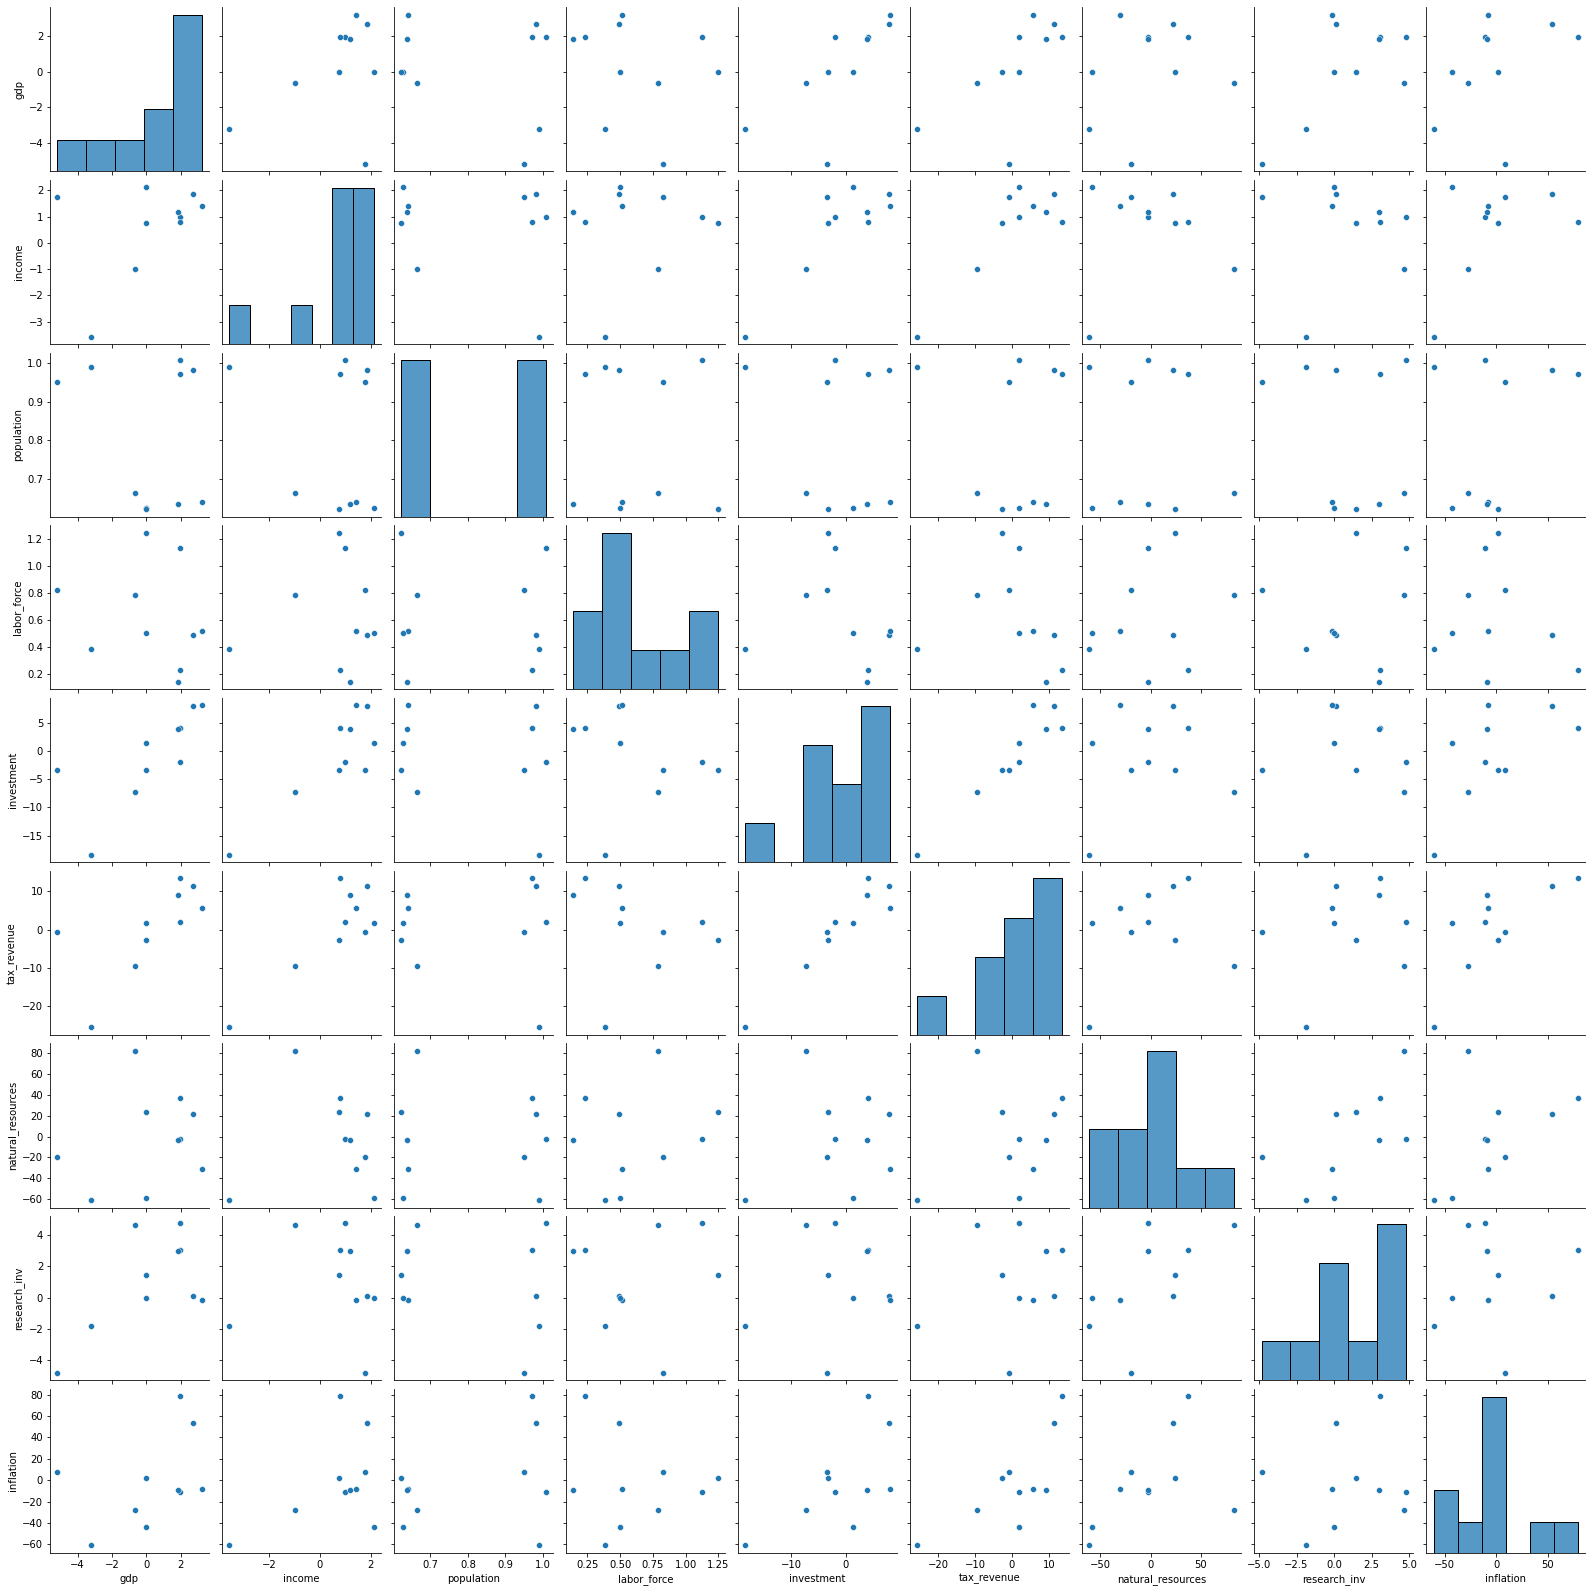

In [91]:
sns.pairplot(usa_gdp_yoy)

> There seems to be a good correlation between the GDP, tax revenue and investment

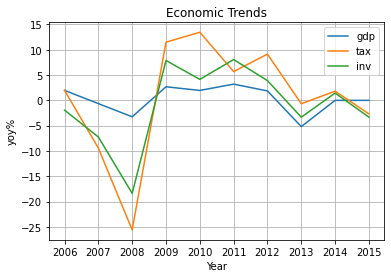

In [92]:
#plotting the three features 
plt.plot(usa_gdp_yoy['year'],usa_gdp_yoy['gdp'], label = "gdp")
plt.plot(usa_gdp_yoy['year'],usa_gdp_yoy['tax_revenue'], label = "tax")
plt.plot(usa_gdp_yoy['year'],usa_gdp_yoy['investment'], label = "inv")
plt.title('Economic Trends')
plt.xlabel('Year')
plt.ylabel('yoy%')
plt.grid(True)
plt.legend()
plt.show()

> Whereas tax rev and investments have good correlation with income

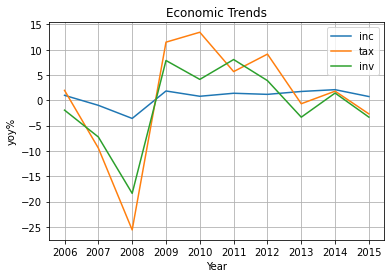

In [93]:
#plotting the income vs tax rev vs investment 
plt.plot(usa_gdp_yoy['year'],usa_gdp_yoy['income'], label = "inc")
plt.plot(usa_gdp_yoy['year'],usa_gdp_yoy['tax_revenue'], label = "tax")
plt.plot(usa_gdp_yoy['year'],usa_gdp_yoy['investment'], label = "inv")
plt.title('Economic Trends')
plt.xlabel('Year')
plt.ylabel('yoy%')
plt.grid(True)
plt.legend()
plt.show()

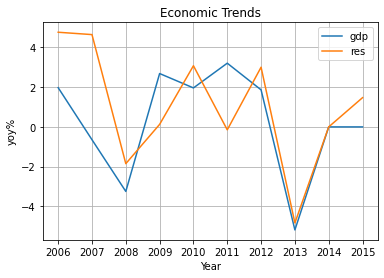

In [94]:
#plotting the gdp vs research investment 
plt.plot(usa_gdp_yoy['year'],usa_gdp_yoy['gdp'], label = "gdp")
plt.plot(usa_gdp_yoy['year'],usa_gdp_yoy['research_inv'], label = "res")
plt.title('Economic Trends')
plt.xlabel('Year')
plt.ylabel('yoy%')
plt.grid(True)
plt.legend()
plt.show()

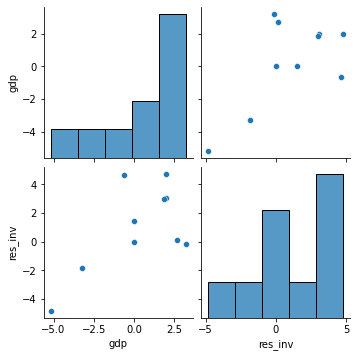

In [95]:
research = pd.DataFrame(usa_gdp_yoy['gdp'])
research['res_inv'] = usa_gdp_yoy['research_inv']
sns.pairplot(research);

> Having a good investment rate in R&D is good for the economy as technology plays an important role in the potential gdp growth for developed countries

# Research Question 3 -
### What were the features during the financial crash of 2007 ?

In [96]:
usa.query('year == "2007"')

,year,gdp_trillions,income,inflation_p,interest_rate_p,population_m,labor_participation,inv_p,tax_rev_p,natural_resources_rent_p,research_inv_p,HDI,tech_exports_billions
2,2007,15.4,504000,1.95,2.0,303,83.2,21.1,10.3,1.91,2.77,0.907,154.0


# Research Question 3 -
### GDP change from 2005 to 2015?

In [97]:
x = usa_gdp.query('year=="2005"')

In [98]:
y = usa_gdp.query('year=="2015"')

In [99]:
x = x.append(y)

In [100]:
x['gdp'].pct_change()*100

0          NaN
10    2.302632
Name: gdp, dtype: float64

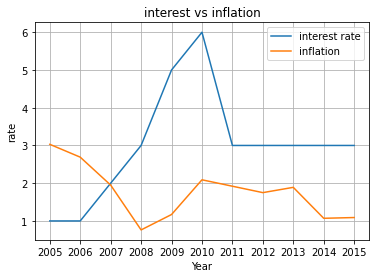

In [101]:
# Visualizing Monetary Policy Trend against Inflation
plt.plot(usa['year'],usa['interest_rate_p'], label = "interest rate")
plt.plot(usa['year'],usa['inflation_p'], label = "inflation")
plt.title('interest vs inflation')
plt.xlabel('Year')
plt.ylabel('rate')
plt.grid(True)
plt.legend()
plt.show()

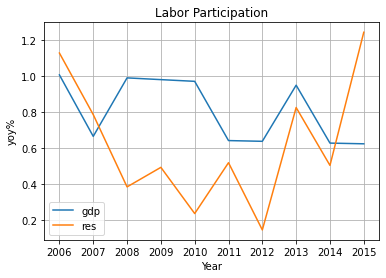

In [102]:
#plotting the population vs labor participation 
plt.plot(usa_gdp_yoy['year'],usa_gdp_yoy['population'], label = "gdp")
plt.plot(usa_gdp_yoy['year'],usa_gdp_yoy['labor_force'], label = "res")
plt.title('Labor Participation')
plt.xlabel('Year')
plt.ylabel('yoy%')
plt.grid(True)
plt.legend()
plt.show()

# <a id='conclusions'></a>
## Conclusions

> The US economy grew at a steady rate of 2.30% this is purely dependent on the quality of the data

> The only time interest rates were lower than the inflation rate was during 2007 financial crisis

> A high level of capital per worker is available in developed countries and this leads to diminishing marginal productivity. The economy needs to invest more in technological advances to increase total factor productivity. An upward trend in R&D investement can contribute to the potential economic growth

> The highest HDI was associated with highest income
> Tax revenue and Investment highly contribute to GDP growth. An increase in labor participation and income contributes to tax revenue and investment

> The upward trend in labor participation for a given population is very good for the economy

# Limitations

> The dataset doen't answer unemployment related effects which directly impacts the tax revenue, investment, inflation and ultimately GDP

> The dataset shows us the trends over the years but it can't point out the exact cause for the decline and rise

> The data had lots of missing data and had to be filled with average to perform analysis. This could affect the accuracy of the data

# Duplicates 

> The duplicates were checked and there were none for the missing value, I filled them with mean. For example - there were values missing for 2013, 2014 and 2015 gdp data

In [1]:
#### CFA level 1 Macro Economics Curriculum was utilized to choose the features ##########